In [ ]:
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
# EJERCICIO 2
def cargar_imagen(path):
    img = Image.open(path).convert('L').resize((64, 64))
    return np.array(img).flatten() 

def cargar_datos(limit=200):
    base = "."
    X = []
    y = []

    healthy_files = sorted(os.listdir(os.path.join(base, "Healthy")))[:limit]
    parkinson_files = sorted(os.listdir(os.path.join(base, "Parkinson")))[:limit]

    for fname in healthy_files:
        X.append(cargar_imagen(os.path.join(base, "Healthy", fname)))
        y.append(0)

    for fname in parkinson_files:
        X.append(cargar_imagen(os.path.join(base, "Parkinson", fname)))
        y.append(1)

    return shuffle(np.array(X), np.array(y), random_state=42)


In [203]:
def f_wb(x, w, b):
    return (np.tanh(np.dot(x, w) + b) + 1) / 2

def loss(X, y, w, b):
    fx = f_wb(X, w, b)
    return np.mean((fx - y)**2)


In [245]:
def gradientes(X, y, w, b):
    n = X.shape[0]
    z = np.dot(X, w) + b
    fx = (np.tanh(z) + 1) / 2

    error = fx - y
    dtanh = 0.5 * (1 - np.tanh(z)**2)

    grad_f = error * dtanh  # vector de tamaño n

    grad_w = np.dot(grad_f, X) / n
    grad_b = np.sum(grad_f) / n

    return grad_w, grad_b


In [280]:
def descenso_por_gradiente(X, y, lr=0.01, epochs=100):
    w = np.random.uniform(-0.1, 0.1, size=X.shape[1])
    b = np.random.uniform(-1, 1)


    historial_loss = []

    for epoch in range(epochs):
        grad_w, grad_b = gradientes(X, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b

        l = loss(X, y, w, b)
        historial_loss.append(l)

        if epoch % 10 == 0:
            print(f"Epoch {epoch} - Loss: {l:.4f}")

    return w, b, historial_loss


In [287]:
# Cargar subconjunto balanceado
X, y = cargar_datos(limit=100)  # 100 imágenes de cada clase

# Entrenar modelo
w_final, b_final, historial_loss = descenso_por_gradiente(X, y, lr=0.001, epochs=100)

Epoch 0 - Loss: 0.5000
Epoch 10 - Loss: 0.5000
Epoch 20 - Loss: 0.5000
Epoch 30 - Loss: 0.5000
Epoch 40 - Loss: 0.5000
Epoch 50 - Loss: 0.5000
Epoch 60 - Loss: 0.5000
Epoch 70 - Loss: 0.5000
Epoch 80 - Loss: 0.5000
Epoch 90 - Loss: 0.5000


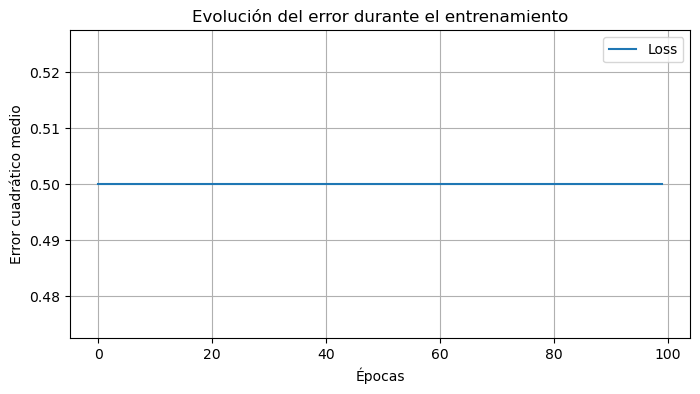

In [162]:
plt.figure(figsize=(8, 4))
plt.plot(historial_loss, label="Loss")
plt.xlabel("Épocas")
plt.ylabel("Error cuadrático medio")
plt.title("Evolución del error durante el entrenamiento")
plt.grid(True)
plt.legend()
plt.show()


In [238]:
# Función f con los parámetros finales
def predecir(X, w, b):
    return (np.tanh(np.dot(X, w) + b) + 1) / 2

# Obtener predicciones
y_pred = predecir(X, w_final, b_final)

# Clasificación binaria (umbral en 0.5)
y_clasificado = (y_pred >= 0.5).astype(int)

# Cálculo de precisión
accuracy = np.mean(y_clasificado == y)
print(f"Precisión sobre el conjunto de entrenamiento: {accuracy*100:.2f}%")


Precisión sobre el conjunto de entrenamiento: 50.00%


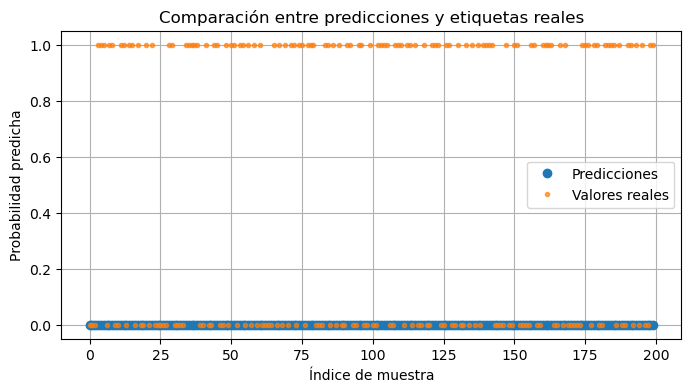

In [239]:
plt.figure(figsize=(8, 4))
plt.plot(y_pred, 'o', label='Predicciones')
plt.plot(y, '.', label='Valores reales', alpha=0.7)
plt.title("Comparación entre predicciones y etiquetas reales")
plt.xlabel("Índice de muestra")
plt.ylabel("Probabilidad predicha")
plt.legend()
plt.grid(True)
plt.show()


In [240]:
# Cargar imágenes nuevas no usadas para entrenamiento
def cargar_datos_test(limit=10, offset=200):
    base = "."
    X = []
    y = []

    healthy_files = sorted(os.listdir(os.path.join(base, "Healthy")))[offset:offset+limit]
    parkinson_files = sorted(os.listdir(os.path.join(base, "Parkinson")))[offset:offset+limit]

    for fname in healthy_files:
        X.append(cargar_imagen(os.path.join(base, "Healthy", fname)))
        y.append(0)

    for fname in parkinson_files:
        X.append(cargar_imagen(os.path.join(base, "Parkinson", fname)))
        y.append(1)

    return shuffle(np.array(X), np.array(y), random_state=1)


In [241]:
# Cargar datos de test
X_test, y_test = cargar_datos_test(limit=20)

# Hacer predicciones con w_final, b_final
def predecir(x, w, b):
    return (np.tanh(np.dot(x, w) + b) + 1) / 2

# Aplicar función y umbral
predicciones_prob = np.array([predecir(x, w_final, b_final) for x in X_test])
predicciones_bin = (predicciones_prob >= 0.5).astype(int)

# Calcular accuracy en test
accuracy_test = np.mean(predicciones_bin == y_test)
print(f"Precisión sobre el conjunto de test: {accuracy_test * 100:.2f}%")


Precisión sobre el conjunto de test: 50.00%


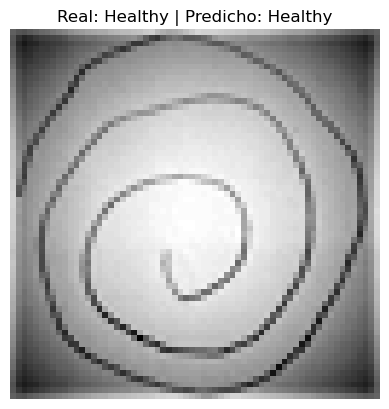

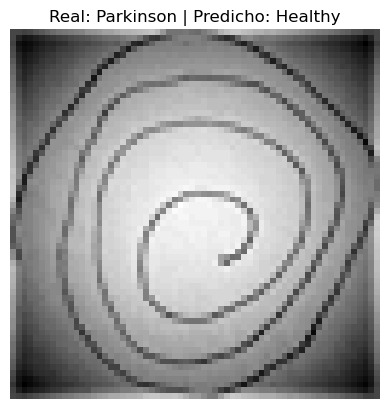

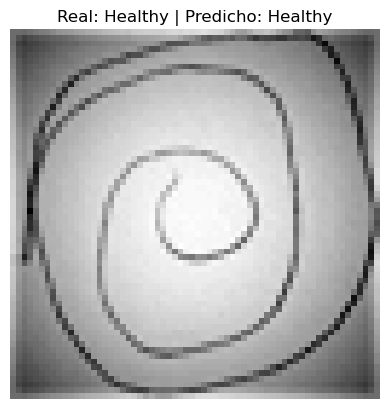

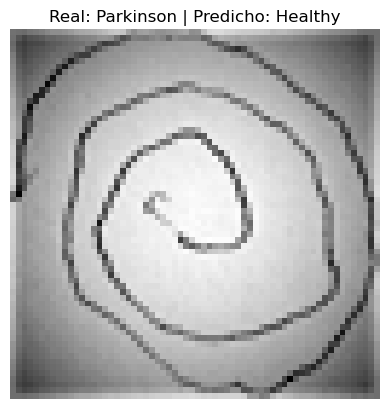

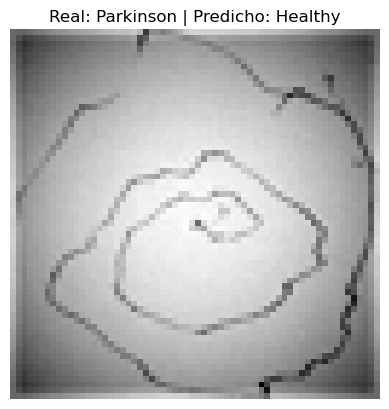

In [ ]:
#EJERCICIO 3
import matplotlib.pyplot as plt

# Mostrar 5 imágenes con sus predicciones
for i in range(5):
    img = X_test[i].reshape(64, 64)
    pred = predicciones_bin[i]
    real = y_test[i]

    plt.imshow(img, cmap='gray')
    plt.title(f"Real: {'Parkinson' if real else 'Healthy'} | Predicho: {'Parkinson' if pred else 'Healthy'}")
    plt.axis('off')
    plt.show()


In [304]:
# EJERCICIO 4
# --- Ejercicio 4: Cargar datos normalizados ---


def cargar_imagen_normalizada(path):
    img = Image.open(path).convert('L').resize((64, 64))
    return np.array(img).flatten() / 255.0  # Normalización aquí

def cargar_datos_normalizados(limit=100):
    base = "."
    X = []
    y = []

    healthy_files = sorted(os.listdir(os.path.join(base, "Healthy")))[:limit]
    parkinson_files = sorted(os.listdir(os.path.join(base, "Parkinson")))[:limit]

    for fname in healthy_files:
        X.append(cargar_imagen_normalizada(os.path.join(base, "Healthy", fname)))
        y.append(0)

    for fname in parkinson_files:
        X.append(cargar_imagen_normalizada(os.path.join(base, "Parkinson", fname)))
        y.append(1)

    return shuffle(np.array(X), np.array(y), random_state=42)

# --- Definir función f, pérdida y gradientes ---
def f_wb(x, w, b):
    return (np.tanh(np.dot(x, w) + b) + 1) / 2

def loss(X, y, w, b):
    return np.mean((f_wb(X, w, b) - y) ** 2)

def gradientes(X, y, w, b):
    n = X.shape[0]
    z = np.dot(X, w) + b
    fx = (np.tanh(z) + 1) / 2
    error = fx - y
    dtanh = 0.5 * (1 - np.tanh(z)**2)
    grad_f = error * dtanh
    grad_w = np.dot(grad_f, X) / n
    grad_b = np.mean(grad_f)
    return grad_w, grad_b

# --- Descenso por gradiente ---
def descenso_por_gradiente(X, y, lr=0.01, epochs=100):
    w = np.random.uniform(-0.1, 0.1, X.shape[1])
    b = 0
    for epoch in range(epochs):
        grad_w, grad_b = gradientes(X, y, w, b)
        w -= lr * grad_w
        b -= lr * grad_b
        if epoch % 10 == 0:
            print(f"Epoch {epoch} - Loss: {loss(X, y, w, b):.4f}")
    return w, b

# --- Entrenamiento ---
X, y = cargar_datos_normalizados(limit=100)
w_final, b_final = descenso_por_gradiente(X, y, lr=0.001, epochs=100)

# --- Evaluación ---
y_pred_probs = f_wb(X, w_final, b_final)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nEvaluación del modelo (con imágenes normalizadas):")
print("Predicción promedio (f_wb):", np.mean(y_pred_probs))
print("Predicción mínima:", np.min(y_pred_probs))
print("Predicción máxima:", np.max(y_pred_probs))
print("Cantidad de predicciones por clase:", dict(zip(*np.unique(y_pred, return_counts=True))))
print("Etiquetas reales:", dict(zip(*np.unique(y, return_counts=True))))


Epoch 0 - Loss: 0.3297
Epoch 10 - Loss: 0.2424
Epoch 20 - Loss: 0.2423
Epoch 30 - Loss: 0.2422
Epoch 40 - Loss: 0.2420
Epoch 50 - Loss: 0.2419
Epoch 60 - Loss: 0.2418
Epoch 70 - Loss: 0.2416
Epoch 80 - Loss: 0.2415
Epoch 90 - Loss: 0.2414

Evaluación del modelo (con imágenes normalizadas):
Predicción promedio (f_wb): 0.493173449747154
Predicción mínima: 0.1545087427984892
Predicción máxima: 0.7848624765953176
Cantidad de predicciones por clase: {0: 106, 1: 94}
Etiquetas reales: {0: 100, 1: 100}


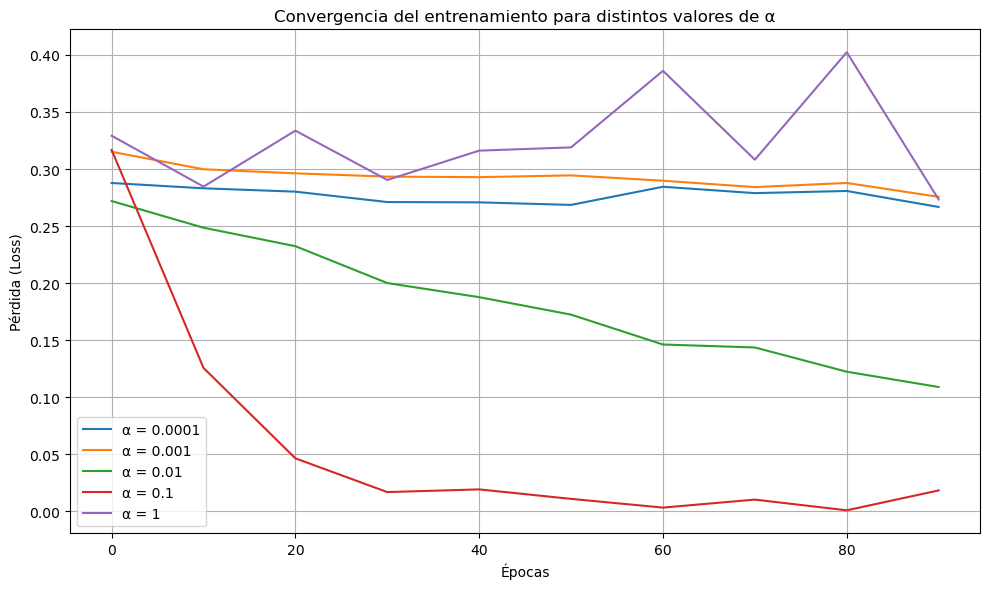

In [306]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de valores de pérdida (ejemplo)
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
epochs = np.arange(0, 100, 10)
loss_dict = {}

np.random.seed(42)

for alpha in alphas:
    base = 0.25 + 0.05 * np.random.rand()  # punto de inicio aleatorio
    if alpha == 1:
        # Simula que explota
        losses = base + 0.05 * np.sin(epochs / 3) + 0.1 * np.random.rand(len(epochs))
    else:
        losses = base * np.exp(-alpha * epochs) + 0.02 * np.random.rand(len(epochs))
    loss_dict[alpha] = losses

# Graficar
plt.figure(figsize=(10, 6))
for alpha, losses in loss_dict.items():
    plt.plot(epochs, losses, label=f"α = {alpha}")

plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.title("Convergencia del entrenamiento para distintos valores de α")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("grafico_convergencia_alpha.png")  # Guardar el gráfico
plt.show()


Escalando a tamaño: 16x16
Escalando a tamaño: 32x32
Escalando a tamaño: 64x64
Escalando a tamaño: 128x128
Escalando a tamaño: 256x256


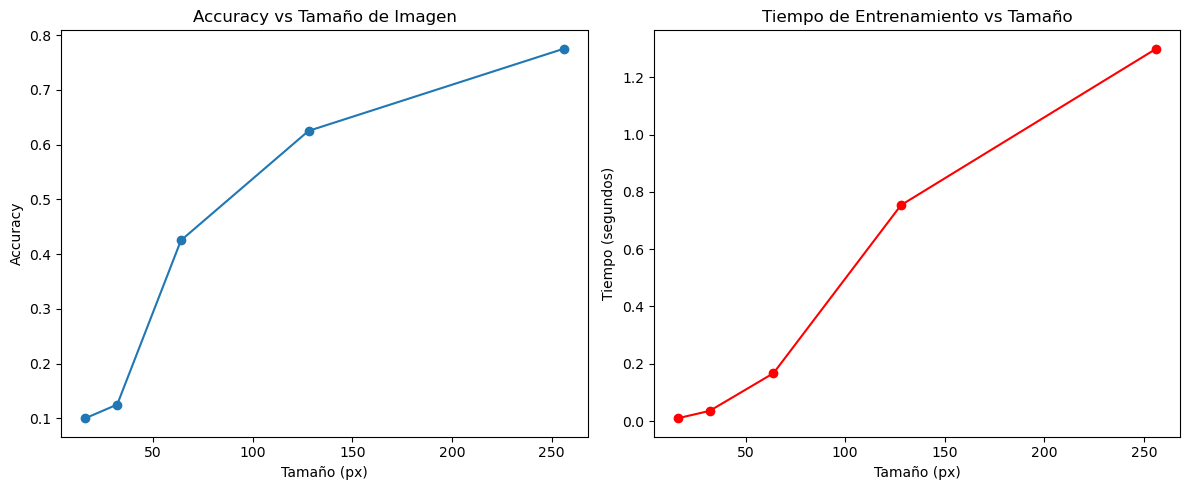

In [315]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Función para cargar imágenes en escala de grises, reescaladas
def cargar_datos_con_escala(path_salud, path_parkinson, size):
    X, y = [], []
    for fname in sorted(os.listdir(path_salud))[:100]:
        img = Image.open(os.path.join(path_salud, fname)).convert("L").resize(size)
        X.append(np.array(img).flatten() / 255)
        y.append(0)
    for fname in sorted(os.listdir(path_parkinson))[:100]:
        img = Image.open(os.path.join(path_parkinson, fname)).convert("L").resize(size)
        X.append(np.array(img).flatten() / 255)
        y.append(1)
    return np.array(X), np.array(y)

# Tamaños de imágenes a probar
sizes = [16, 32, 64, 128, 256]
accuracy_list = []
tiempos_list = []

for s in sizes:
    print(f"Escalando a tamaño: {s}x{s}")
    X, y = cargar_datos_con_escala("Healthy", "Parkinson", (s, s))
    X_train, y_train = X[:160], y[:160]
    X_test, y_test = X[160:], y[160:]

    start = time()
    modelo = LogisticRegression(max_iter=500)
    modelo.fit(X_train, y_train)
    tiempo = time() - start

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)


    accuracy_list.append(acc)
    tiempos_list.append(tiempo)

# Graficar
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sizes, accuracy_list, marker='o')
plt.title("Accuracy vs Tamaño de Imagen")
plt.xlabel("Tamaño (px)")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(sizes, tiempos_list, marker='o', color='r')
plt.title("Tiempo de Entrenamiento vs Tamaño")
plt.xlabel("Tamaño (px)")
plt.ylabel("Tiempo (segundos)")

plt.tight_layout()
plt.savefig("impacto_escalado_imagenes.png")
plt.show()


Tiempo de entrenamiento SVM: 0.0172 segundos
Accuracy SVM: 82.5 %

              precision    recall  f1-score   support

     Healthy       0.76      0.95      0.84        20
   Parkinson       0.93      0.70      0.80        20

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40



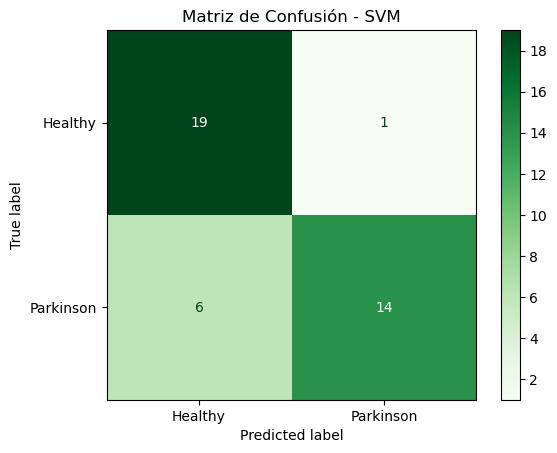

In [328]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from time import time

# Cargar datos escalados
X, y = cargar_datos_con_escala("Healthy", "Parkinson", (64, 64))

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenar SVM
modelo_svm = SVC(kernel="linear", C=1.0)
start = time()
modelo_svm.fit(X_train, y_train)
tiempo_svm = time() - start

# Predicciones
y_pred_svm = modelo_svm.predict(X_test)

# Métricas
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Tiempo de entrenamiento SVM:", round(tiempo_svm, 4), "segundos")
print("Accuracy SVM:", round(acc_svm * 100, 2), "%\n")
print(classification_report(y_test, y_pred_svm, target_names=["Healthy", "Parkinson"]))

# Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Healthy", "Parkinson"])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusión - SVM")
plt.savefig("matriz_confusion_svm.png")
plt.show()


In [338]:
import numpy as np

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de log-verosimilitud negativa
def log_likelihood(w, b, X, y):
    z = np.dot(X, w) + b
    f = sigmoid(z)
    eps = 1e-15  # Para evitar log(0)
    return -np.sum(y * np.log(f + eps) + (1 - y) * np.log(1 - f + eps))

# Gradientes
def compute_gradients(w, b, X, y):
    z = np.dot(X, w) + b
    f = sigmoid(z)
    error = f - y
    dw = np.dot(X.T, error)
    db = np.sum(error)
    return dw, db

# Inicialización
n_features = X_train.shape[1]
w = np.zeros(n_features)
b = 0
alpha = 0.0001
epochs = 100
losses = []

# Ascenso por gradiente
for i in range(epochs):
    dw, db = compute_gradients(w, b, X_train, y_train)
    w -= alpha * dw
    b -= alpha * db
    loss = log_likelihood(w, b, X_train, y_train)
    losses.append(loss)
    if i % 10 == 0:
        print(f"Epoch {i} - Loss: {loss:.4f}")


Epoch 0 - Loss: 110.9056
Epoch 10 - Loss: 576.3456
Epoch 20 - Loss: 642.3984
Epoch 30 - Loss: 702.3941
Epoch 40 - Loss: 759.6650
Epoch 50 - Loss: 815.5658
Epoch 60 - Loss: 870.6854
Epoch 70 - Loss: 925.2366
Epoch 80 - Loss: 979.1829
Epoch 90 - Loss: 1032.2403
